In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
mov_data=pd.read_csv('movies.dat', sep = '::', engine='python', encoding='latin-1')
mov_data.columns =['MovieIDs','MovieName','Category']
mov_data.head()


,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
rate_data=pd.read_csv('ratings.dat', sep = '::', engine='python', encoding='latin-1')
rate_data.columns =['ID','MovieID','Ratings','TimeStamp']
rate_data.head()


,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [6]:
users_data=pd.read_csv('users.dat', sep = '::', engine='python', encoding='latin-1')
users_data.columns =['UserID','Gender','Age','Occupation','Zip-code']
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [7]:
data = pd.concat([mov_data, rate_data, users_data], axis=1)
data.head()


,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [8]:
data.isnull().sum()


MovieIDs      996326
MovieName     996326
Category      996326
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [9]:
data.dropna(inplace=True)


In [10]:
data.isnull().sum()


MovieIDs      0
MovieName     0
Category      0
ID            0
MovieID       0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [11]:
data.drop(columns=["MovieName","MovieID","UserID","ID","Zip-code"],axis=1,inplace = True)


In [12]:
data


,MovieIDs,Category,Ratings,TimeStamp,Gender,Age,Occupation
0,2.0,Adventure|Children's|Fantasy,3,978302109,M,56.0,16.0
1,3.0,Comedy|Romance,3,978301968,M,25.0,15.0
2,4.0,Comedy|Drama,4,978300275,M,45.0,7.0
3,5.0,Comedy,5,978824291,M,25.0,20.0
4,6.0,Action|Crime|Thriller,3,978302268,F,50.0,9.0
...,...,...,...,...,...,...,...
3877,3948.0,Comedy,4,978125960,M,25.0,3.0
3878,3949.0,Drama,2,978982323,M,25.0,7.0
3879,3950.0,Drama,3,978126491,M,18.0,2.0
3880,3951.0,Drama,5,978985294,M,56.0,14.0


In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Gender'] = labelencoder.fit_transform(data['Gender'])
data['Category'] = labelencoder.fit_transform(data['Category'])


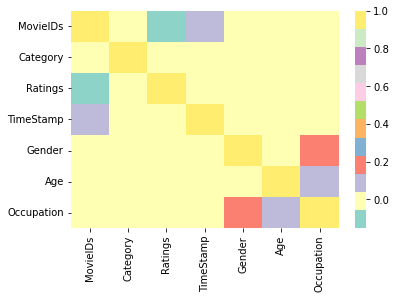

In [15]:
sns.heatmap(data.corr(),cmap = 'Set3')
plt.show()


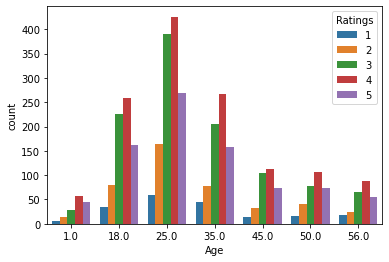

In [16]:
sns.countplot(x=data['Age'],hue=data['Ratings'])
plt.show()

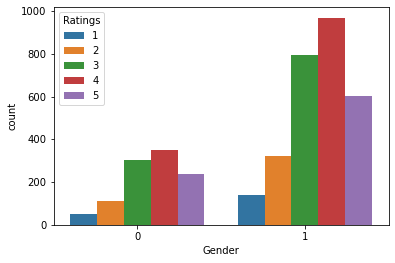

In [17]:
sns.countplot(x=data['Gender'],hue=data['Ratings'])
plt.show()

In [18]:
data1=data.drop(['Ratings','Occupation','TimeStamp'],axis=1)
data1


,MovieIDs,Category,Gender,Age
0,2.0,115,1,56.0
1,3.0,207,1,25.0
2,4.0,185,1,45.0
3,5.0,176,1,25.0
4,6.0,63,0,50.0
...,...,...,...,...
3877,3948.0,176,1,25.0
3878,3949.0,239,1,25.0
3879,3950.0,239,1,18.0
3880,3951.0,239,1,56.0


In [19]:
data2=data['Ratings']
data2

0       3
1       3
2       4
3       5
4       3
       ..
3877    4
3878    2
3879    3
3880    5
3881    4
Name: Ratings, Length: 3882, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data1)
scaled1= pd.DataFrame(scaled, columns=data1.columns)
scaled1

,MovieIDs,Category,Gender,Age
0,0.000000,0.383333,1.0,1.000000
1,0.000253,0.690000,1.0,0.436364
2,0.000506,0.616667,1.0,0.800000
3,0.000759,0.586667,1.0,0.436364
4,0.001013,0.210000,0.0,0.890909
...,...,...,...,...
3877,0.998987,0.586667,1.0,0.436364
3878,0.999241,0.796667,1.0,0.436364
3879,0.999494,0.796667,1.0,0.309091
3880,0.999747,0.796667,1.0,1.000000


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(scaled1,data2, test_size = 0.33)

In [23]:
X_train


,MovieIDs,Category,Gender,Age
2674,0.694177,0.796667,1.0,1.000000
2312,0.602532,0.586667,0.0,0.436364
84,0.021266,0.420000,0.0,0.000000
493,0.125570,0.840000,1.0,0.309091
3779,0.974177,0.780000,0.0,1.000000
...,...,...,...,...
3456,0.892152,0.616667,1.0,0.800000
2372,0.617722,0.796667,1.0,0.436364
775,0.198481,0.306667,1.0,0.309091
3726,0.960506,0.970000,1.0,0.309091


In [24]:
y_test


3078    3
2831    4
3595    3
2000    3
670     5
       ..
3378    3
1413    3
3733    3
2334    3
3481    3
Name: Ratings, Length: 1282, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [27]:
model.predict(X_test)


array([4, 4, 3, ..., 3, 4, 3], dtype=int64)

In [28]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.35
